Data Loaded


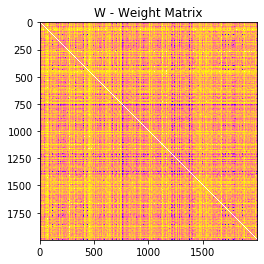

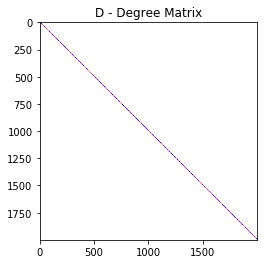

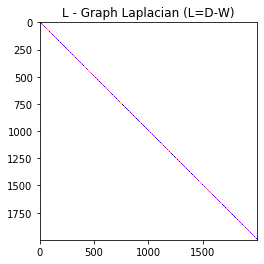

In [24]:
import scipy as sp
import scipy.linalg as linalg
from sklearn.cluster import KMeans
import numpy as np
import spectral_clustering_helper as scplot
import pandas as pd
from matplotlib import pyplot as plt
import pickle as pkl

########################
#       Parameters     #
########################

k=4 #Number of clusters (segments of graphs to create)
dist_centers = [25,75,125,175]
dist_sd = 10
dist_cnt = 50



########################
#       Setup etc      #
########################

#Functions 
k=20

#Functions a
def similarity(x,y):
    #return 1000/(linalg.norm((x-y),2))
    return linalg.norm(np.multiply(x,y), ord=0)
    #return linalg.norm(np.multiply(x,y), ord=0) + (len(x) - linalg.norm(np.add(x,y), ord=0))

x_list = []

#data = pd.read_csv("DataSets/MINST.txt", header=None, delim_whitespace=True)
#for i, row in data.iterrows():
#    x_list.append(np.array(row))

mnist_img_with_labels = pkl.load(open('MNIST_IMG_WITH_LABELS.pkl','rb'))
data=[]
for m in mnist_img_with_labels[:2000]:
    x_list.append(m[0])

print('Data Loaded')

L,W,D = scplot.createMatrices(x_list[0:2000], similarity)
#L,W,D,cutoff = scplot.convertToEpsilonNeighborhoodGraphByPercentile(W, .1)


#Plot L,D and W
scplot.plot_matrix(W, "W - Weight Matrix")
scplot.plot_matrix(D,"D - Degree Matrix")
scplot.plot_matrix(L,"L - Graph Laplacian (L=D-W)")



########################
#       Clustering     #
########################

# eigen values and clustering
e_val,e_vec = linalg.eigh(L,D)

km = KMeans(n_clusters=k).fit(e_vec[:,0:k])

# plot output
#print("Output of KMeans Clustering")
#display(km.cluster_centers_)
#display(km.labels_)

########################
#       Outputs        #
########################

data_cluster = pd.DataFrame({'Label':km.labels_})
data_cluster_result = data_cluster.groupby('Label').count().reset_index()


#print("Cluster counts and Ranges:")
#display(data_cluster_result)
    
imdict = {}
i = -1;
for l in km.labels_:
    i+=1
    if l not in imdict.keys():
        imdict[l] = [x_list[i]]
    else:
        imdict[l].append(x_list[i])
    
#print(len(km.labels_))
#print(km.labels_)

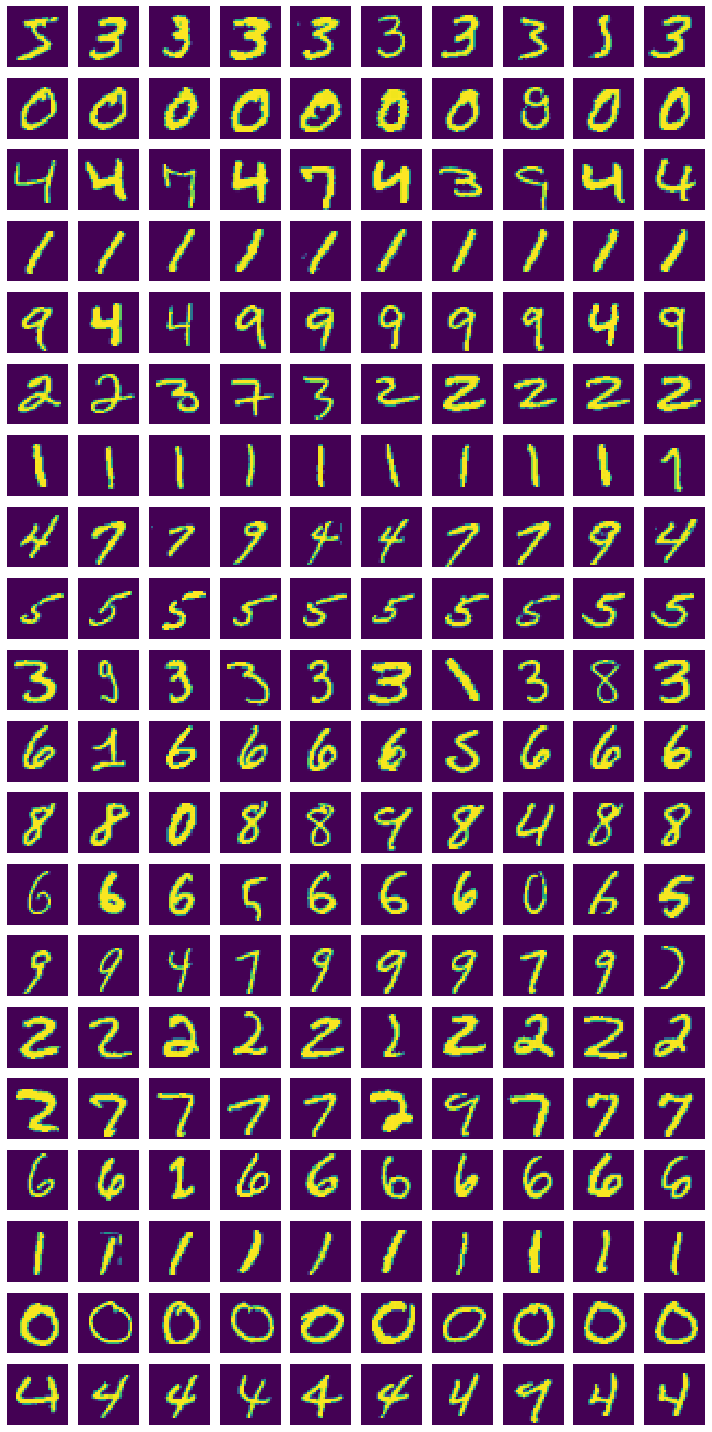

In [25]:
fig, ax = plt.subplots(len(imdict.keys()),10, figsize=(10,20))
fig.subplots_adjust(hspace=0, wspace=0) 
r = -1
for k in imdict.keys():
    r += 1
    for a in range(0,min(10,len(imdict[k]))):
        ax[r,a].imshow(imdict[k][a].reshape((28, 28)))
        ax[r,a].set_axis_off()
plt.tight_layout()
plt.show()
fig.savefig("number_clustering_20_2norm.png")
plt.close()

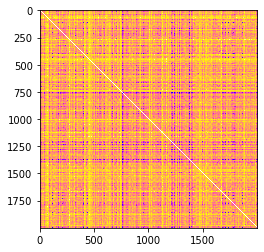

In [26]:
fig = plt.figure(figsize=(4,4))
plt.imshow(W, cmap=plt.cm.gnuplot2.reversed())
plt.gca().xaxis.tick_bottom()
plt.show()
fig.savefig('w_2norm.png')

In [27]:
e_val[:550]

array([1.01583427e-15, 8.91443153e-01, 9.16052345e-01, 9.30553785e-01,
       9.40904263e-01, 9.47662075e-01, 9.62041138e-01, 9.68567401e-01,
       9.72167527e-01, 9.74918276e-01, 9.78922569e-01, 9.80631580e-01,
       9.81140875e-01, 9.84655982e-01, 9.84920310e-01, 9.85744648e-01,
       9.87351330e-01, 9.88845740e-01, 9.89236721e-01, 9.90009735e-01,
       9.90465889e-01, 9.91385115e-01, 9.91756008e-01, 9.92109148e-01,
       9.92763502e-01, 9.93031219e-01, 9.93545345e-01, 9.93788557e-01,
       9.93966511e-01, 9.94548183e-01, 9.94982481e-01, 9.95737217e-01,
       9.95804995e-01, 9.95931836e-01, 9.96139319e-01, 9.96248083e-01,
       9.96357487e-01, 9.96546481e-01, 9.96858324e-01, 9.96933361e-01,
       9.97023129e-01, 9.97268864e-01, 9.97379923e-01, 9.97627222e-01,
       9.97672995e-01, 9.97799722e-01, 9.97888508e-01, 9.98000417e-01,
       9.98045962e-01, 9.98056965e-01, 9.98151709e-01, 9.98309725e-01,
       9.98370413e-01, 9.98459748e-01, 9.98499228e-01, 9.98561411e-01,
      

In [13]:
e_vec

array([[ 5.92442009e-05,  9.12657417e-06, -1.87159597e-05, ...,
         1.97420462e-05, -8.13351791e-06, -7.76119059e-06],
       [ 5.92442009e-05, -6.35351000e-05, -7.50742318e-05, ...,
         2.67823914e-05,  2.51527035e-06,  4.13821073e-05],
       [ 5.92442009e-05, -1.03733502e-04,  1.54869358e-05, ...,
         2.96192260e-04,  3.74345356e-05, -4.50876289e-05],
       ...,
       [ 5.92442009e-05, -4.15461011e-05, -5.37534626e-05, ...,
        -1.34349104e-05,  1.08162872e-05, -6.71865900e-06],
       [ 5.92442009e-05,  4.89515917e-05,  8.70471334e-06, ...,
        -4.39894503e-06, -7.08016259e-06,  5.45160646e-06],
       [ 5.92442009e-05, -6.17111019e-05, -5.08250363e-05, ...,
         5.03070874e-06, -2.70921170e-05, -2.91835209e-05]])